

# Project: Can Age And Gender Predict If A Person Is More Likely to Miss An Appointment? - [No show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
. 

This dataset contains the information on approximately 100,000+ medical appointments in Brazil, with a particular focus on if patients did or did not show up to thier scheduled appointment. The following columns are in our dataset:

* patientid - unique id for each patient
* appointmentid - unique id for each appointment.
* gender - specifies gender of patient
* appointmentday - specifies day of appointment.
* age - age of patient
* neighborhood - area patient resides
* scholarship - if patient has scholarship
* hypertension - if patient has hypertension
* diabetes - if patient has diabetes
* handicap - if patient has a handicap
* sms_recieved - if patient got text confirmation
* no-show - if patient did not show up for appointment.

The above are columns in our dataset. It should be noted, some columns contain misspelling/formatting errors. For the sake of readability, I typed them correctly in the above list. They will actually be corrected or dropped in our data cleaning stage. We will also make a new dataframe based off this one, with only pertinent columns. The new dataframe will only contain the columns :
* Gender - specifies person's gender
* Age - specifies person's age
* No_show - specifies if patient did not show up for appointment
* Age_range - places person in categorical age group based on age.


### Question(s) for Analysis


For this dataset, we will be exploring the following question:

1. What is the overall no show rate, regardless of gender or age?
2. What percentage of men are no shows?
3. What percentage of women are no shows?
4. Which age group of either gender are more likely to show up?
5. Which age group of either gender are more likely to not show up?





In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# DO NOT RUN PER INSTRUCTOR , CORRUPTS KERNEL# Upgrade pandas to use dataframe.explode() function. #DO NOT USE PER INSTRUCTOR
###!pip install --upgrade pandas==0.25.0 DO NOT USE PER INSTRUCTER, CAUSES ERROR

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head() # checking to make sure data was properly loaded in.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe() #inspect the data

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we are generally inspecting data for any anomalies. We see that min age is showing -1 and is an error. This row will be dropped during cleaning. We see that 37 is the mean age for the dataset. We also see some mispelling and inconsistencies in the naming scheme of columns, we will correct this later during our cleaning. 

In [5]:
#inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here we are seeing that scheduledDay and AppointmentDay are showing as objects. They should be datetime to make them more consise and useful for any operations performed on them. However, considering that neither of these two columns are particularly useful to us in our question, we will drop them. We are seeing signs that this dataset has no null values based on each row being consistent. We will confirm this with more explanation.

In [6]:
df.shape #show number of rows and columns within dataset

(110527, 14)

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Here we are confirming that there are no null values as suspected from previous operation.

In [8]:
df.duplicated().sum() #checking for duplicates


0

Dataset contains no duplicate rows.


### Data Cleaning


In [9]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df.drop(df.index[99832], inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


We see that row containing the negative age value has been successfully dropped from the table.

In [12]:
# Correct spelling errors/inconsistencies in our column names

df.rename(columns = {'PatientId' :'Patient_Id', 'AppointmentID' : 'Appointment_Id', 'ScheduledDay': 'Scheduled_Day',
                     'AppointmentDay':'Appointment_Day', 'Hipertension':'Hypertension', 'Handcap':'Handicap',
                     'No-show':'No_show'}, inplace = True)
df.head()

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here we have corrected several misspellings and inconsistencies in our column names to make them more precise and readable. It should be noted that we will not be using a large number of these columns in our actual analysis. Later, we will make a new table with the columns needed for analysis. Even though we are not using said columns we still corrected them to help with the integrity of the original table.

In [13]:
# create new table containing only pertinent columns needed for our analysis
my_df = df[['Gender','Age','No_show']].copy()
my_df.head()

,Gender,Age,No_show
0,F,62,No
1,M,56,No
2,F,62,No
3,F,8,No
4,F,56,No


Since we are focusing our analysis on age and gender and thier potential impact on a patient's probability of showing up or not, these are the only relevant columns we will need. Others have been dropped. We will however add a new column to this to help with our explorations later.

In [14]:
#Creating a new column 'Age_range' to allow for categorical analysis
age_bins = [0,17,35,54,67,150]
age_labels =['Minor', 'Young Adult', 'Middle Aged', 'Mature Adult', 'Senior']

my_df['Age_range'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)

In [15]:
my_df.head()

,Gender,Age,No_show,Age_range
0,F,62,No,Mature Adult
1,M,56,No,Mature Adult
2,F,62,No,Mature Adult
3,F,8,No,Minor
4,F,56,No,Mature Adult


Above you can see we have added a new column to our new dataframe. It is titled 'Age_range' and will group patients into thier corresponding age groups based on thier age. This will allow for categorical analysis. The age ranges are as follows:
* Minor 0 - 17
* Young Adult 18 - 35
* Middle aged 36 - 54
* Mature adult 55 - 67
* Senior 68 +

In [16]:
#creating mask to get the overall number of males, regardless of no show status, in our table
male_mask = my_df['Gender'] == 'M'
male_mask.sum()

38687

In [17]:
#creating mask to get the overall number of females, regarless of no show status, in our table
female_mask = my_df['Gender'] == 'F'
female_mask.sum()


71839

 We created a mask and used it to find the number of both males and females, regardless of no show status. We will reference these numbers later.

<a id='eda'></a>
## Exploratory Data Analysis




### What is the overall no show rate, regardless of gender or age?

Text(0.5,1,'Overall No Show Rate')

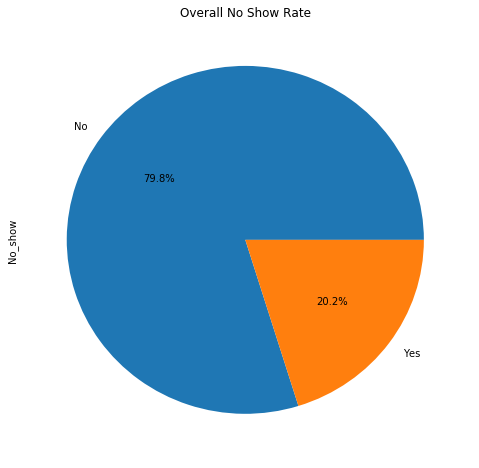

In [18]:
#creating pie chart to show overall no show rate
my_df['No_show'].value_counts().plot(kind = 'pie', figsize = (8,8), autopct = '%1.1f%%')
plt.title('Overall No Show Rate')

Here is a pie chart that shows us the overall no show rate, approximately 20%, of our dataset. This is an overall view and not specific to age or gender. We have our first insight from this. We see that regardless of gender or age, the chance of any given person showing up for their appointment is 80%. We will dive deeper with further explorations.

### What  percentage of men are no shows?

Text(0.5,1,'Male No Show Rate')

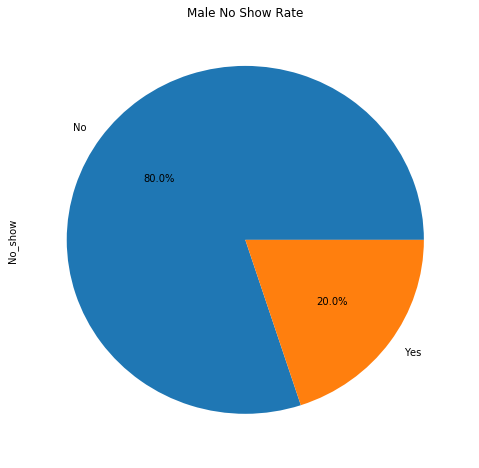

In [19]:

#creating pie chart to show overall no show percentage of men
male_counts = my_df[my_df['Gender'] == 'M'] # Filter table to only males
male_counts['No_show'].value_counts().plot(kind = 'pie', figsize = (8,8), autopct = '%1.1f%%')
plt.title('Male No Show Rate')

Interestingly enough, we see that when we filter to just males, the pie chart stays almost the same. Approximately 20% of males do not show up to thier appointments.

### What percentage of women are no shows?

Text(0.5,1,'Female No Show Rate')

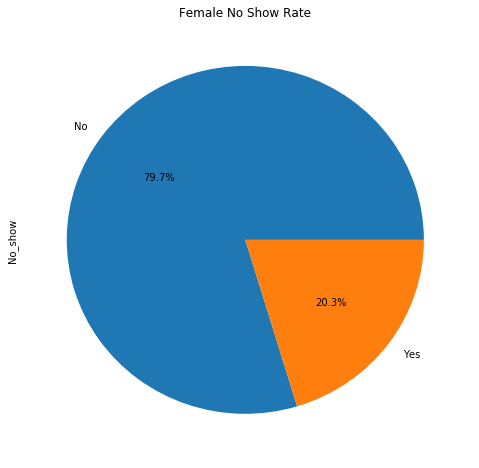

In [20]:
#creating pie chart to show percentage of women who are no shows
female_counts = my_df[my_df['Gender'] == 'F'] # Filter table to only females
female_counts['No_show'].value_counts().plot(kind = 'pie', figsize = (8,8), autopct = '%1.1f%%')
plt.title('Female No Show Rate')

Here we see the same trend continue. Coincidentally, the pie chart is near identical to the other two. This means approximately 20% of all females do not show up for thier appointments.

In [21]:
my_df.groupby(['No_show','Gender']).size() #checking to make sure we have correct data

No_show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
dtype: int64

So we can see here that the average rate of no shows is approximately 20% across the board. The 3 categories we looked at: Overall, Male, and Female all show the same no show rate of approximately 20%. This struck me as odd, that they would all be approximately the same. The cell above shows the use of the groupby method to show all our male and female shows and no shows. I double checked the math with a calculator to ensure data integrity. I will demonstrate now for clarity.

<span style="background-color:yellow">Overall total of patients in database = 110,526</span>
<span style="background-color:red">Overall total of no shows in database = 22,319</span>

**overall males in database = 38,687**
*male no shows =7725  male show up = 30,962*

**overall females in database = 71,839**
*female no shows = 14,594  female show up = 57,245*

* Overall no show rate = 22,319 / 110,526 = .2019
* Male no show rate = 7,725 / 38,687 = .1996
* Female no show rate = 14,594 / 71,839 = .2031

So we can see that this is in fact correct. At first, I was suspicious as they were all near identical, but with proper investigation we see that they are infact correct and integrity has not been comprised. From this we see no evidence that gender, regardless of age, effects whether or not a person misses thier appointment.

NOTE: This arguably could have been put in the cleaning part. However, until seeing the data charted, the thought there might be an error had not occured. I kept this in this section to give the reader context when seeing it and to also show that the above charts are in fact correct and reflecting the data properly.



### which age group of either gender more likely to show up?

In [29]:
#create a function for our grouped bar charts
def grouped_bar_chart(df,column_filter, title):
    func_df = df[df['No_show'] == column_filter]
    plt.figure(figsize=(10, 10))
    func_df.groupby(['Gender','Age_range']).size().unstack().plot(kind = 'bar', stacked = False)
    plt.title('Patients who showed up by Age range')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()


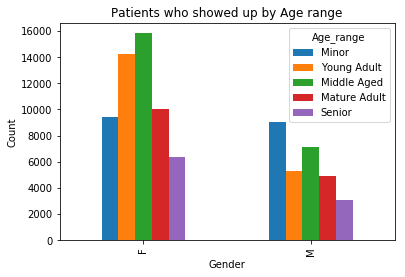

In [30]:
grouped_bar_chart(my_df, 'No', 'Patients who showed up by Age range')

Based on this chart, middle aged females have the highest incidence of showing up for an appointment.

### ### Which age group of either gender more likely to not show up?

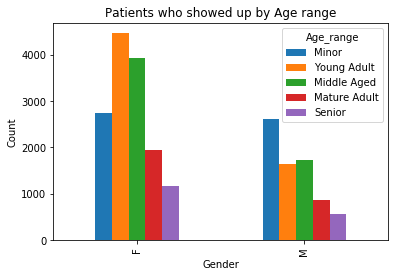

In [31]:
grouped_bar_chart(my_df, 'Yes', 'Patients who did not show up by Age range')

Based on this chart we see that young adult aged women have the highest incidence of not showing up for an appointment.

<a id='conclusions'></a>
## Conclusions


From this report, we have learned several things. The no show rate for both genders, without regard to age, is approximately 20%. This is for both men and women. This also is the rate for the dataset as a whole, with no regard to gender. There is no strong evidence to suggest gender alone has any effect on whether or not a person does or does not show up for an appointment. However, when we introduce age groups to both genders, we do see a noticeable correlation between young adult aged women and a higher incidence of no show rate. This is not to conclusively say that young adult aged females have a guaranteed higher incidence of not showing up, but that there is a noticeable uptick in no show incidence among that demographic. Conversely, middle aged females have the highest incidence of showing up to an appointment. This not conclusive as to state as fact, but rather the observation of a notable incidence. 

### Limitation
In our findings, we saw that males within the minor age group were both most likely and least likely to show up for an appointment among all male age groups. It could be tempting for one to think 'Perhaps, minor males make up the majority of the male clientele and that's why'.But because we looked at age groups in relation to show/no show rate, as opposed to in relation to proportion of their gender size as a whole, we cannot infer exactly why that is. We would caution the reader NOT to make that assumption. Had that been in scope of this report, we might could infer why that is. But because of that limitation, any statements as to why that may be would be pure speculation.

NOTE: In no way are we inferring or trying to suggest to the reader that 'male minors are the majority of male clientele' but rather, we are simply using that as an example to illustrate the limitation of why we do not know why minor males are both most/least likely to show up for an appointment. More research would need to be done before anything close to that could be stated.

It should also be noted that there are many more incidences of females that attend this medical facility than males. This may cause findings to be biased towards one gender and skew our findings toward the dominant gender. This presents a limitation.

### References
https://matplotlib.org/stable/





## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0